In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()
x_train = x_train /255.0
x_test=x_test/255.0

x_train =x_train[...,None]
x_test=x_test[...,None]

In [12]:
encoder=keras.Sequential ([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32,activation='relu'),])
    

In [13]:
decoder=keras.Sequential([
    layers.Dense(64, activation ='relu' , input_shape=(32,)),
    layers.Dense(28*28 , activation='sigmoid' ),
    layers.Reshape((28,28,1))
])

In [14]:
#combine encoder and decoder 
autoencoder=keras.Sequential([encoder,decoder])

In [16]:
history=autoencoder.compile(optimizer='adam', loss ='mse', metrics=['mae'])

In [17]:
history=autoencoder.fit(x_train,x_train, epochs=5,batch_size=256 , validation_data=(x_test,x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0638 - mae: 0.1407 - val_loss: 0.0372 - val_mae: 0.0910
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0316 - mae: 0.0802 - val_loss: 0.0265 - val_mae: 0.0699
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0242 - mae: 0.0652 - val_loss: 0.0211 - val_mae: 0.0589
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199 - mae: 0.0564 - val_loss: 0.0180 - val_mae: 0.0524
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175 - mae: 0.0510 - val_loss: 0.0162 - val_mae: 0.0482


In [18]:
loss,mae=autoencoder.evaluate(x_test,x_test)
print('test_loss',loss)
print('mae',mae)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162 - mae: 0.0482 
test_loss 0.016168825328350067
mae 0.04819206893444061


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


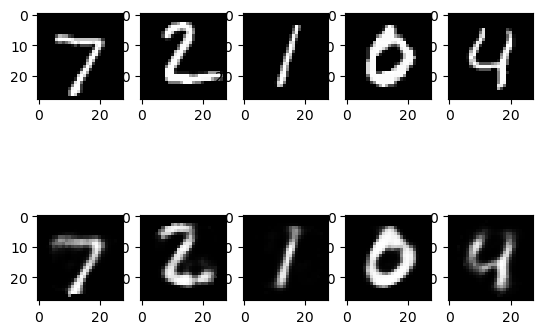

In [24]:
n=5
decoded_images=autoencoder.predict(x_test[:n])
for i in range(n):
    plt.subplot(2,n,i+1); plt.imshow(x_test[i].squeeze(), cmap ='gray')
    plt.subplot(2,n,i+1+n) ; plt.imshow(decoded_images[i].squeeze() , cmap ='gray')
plt.show()